## Logistic Regression to predict heart disease

#### World Health Organization has estimated 12 million deaths occur worldwide, every year due to heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

### Importing necessary libraries and reading the dataset

In [351]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Preprocessing

In [352]:
#### Count of missing value counts

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [353]:
#### First we need to decide the importance of the rows that have NaN Glucose values

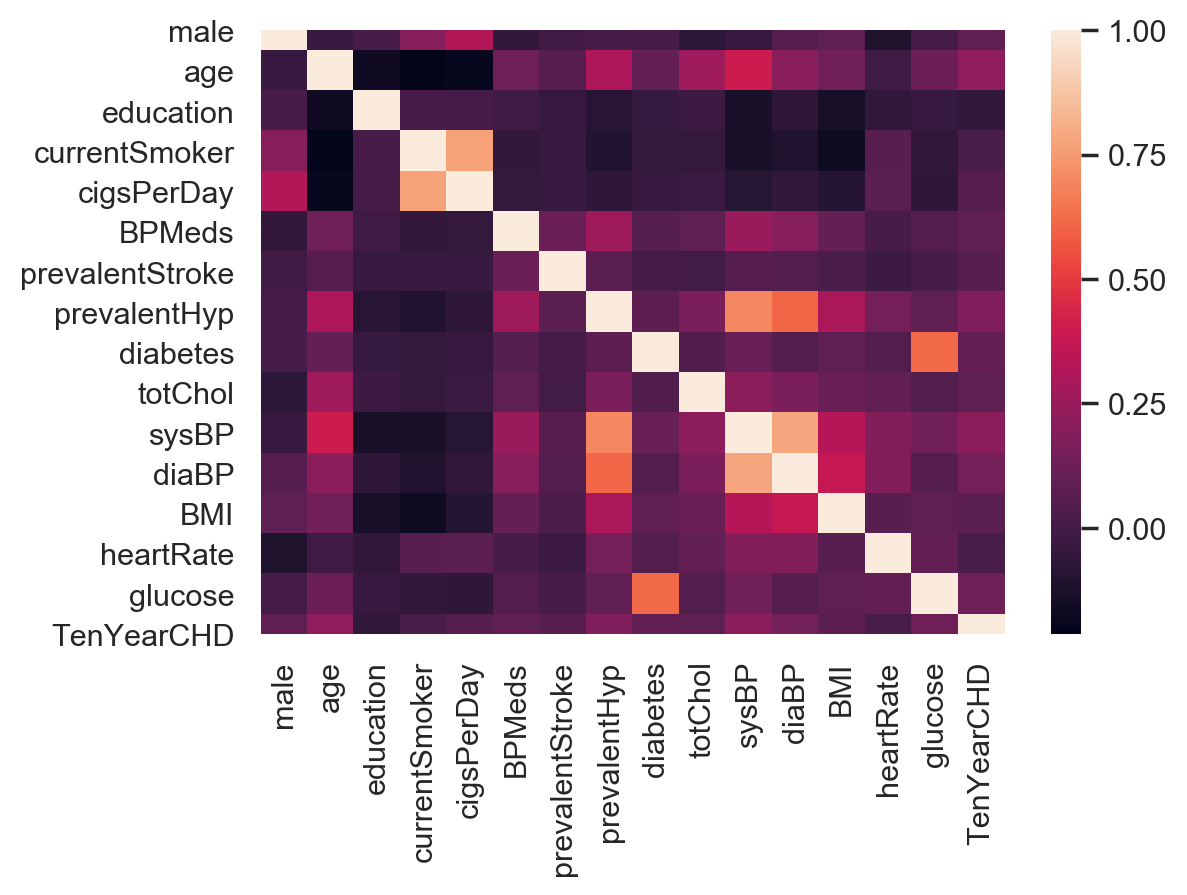

In [354]:
#### Search for correlation of glucose with other variables
plt.figure(dpi=200)
sns.heatmap(df.corr())

In [355]:
#### Diabetes seems to be high from heatmap, let's see real values. 
df[['glucose', 'diabetes']].corr()

,glucose,diabetes
glucose,1.000000,0.617627
diabetes,0.617627,1.000000


In [356]:
#### Let's see dataframe where glucose values are null 
#### And count of absent diabetes

dataframeWithNullGlucoseValues = df.loc[df['glucose'].isnull()]
print('Diabetes is 0, count =',len(dataframeWithNullGlucoseValues[dataframeWithNullGlucoseValues['diabetes']==0]))
print('Diabetes is 1, count =',len(dataframeWithNullGlucoseValues[dataframeWithNullGlucoseValues['diabetes']==1]))

Diabetes is 0, count = 384
Diabetes is 1, count = 4


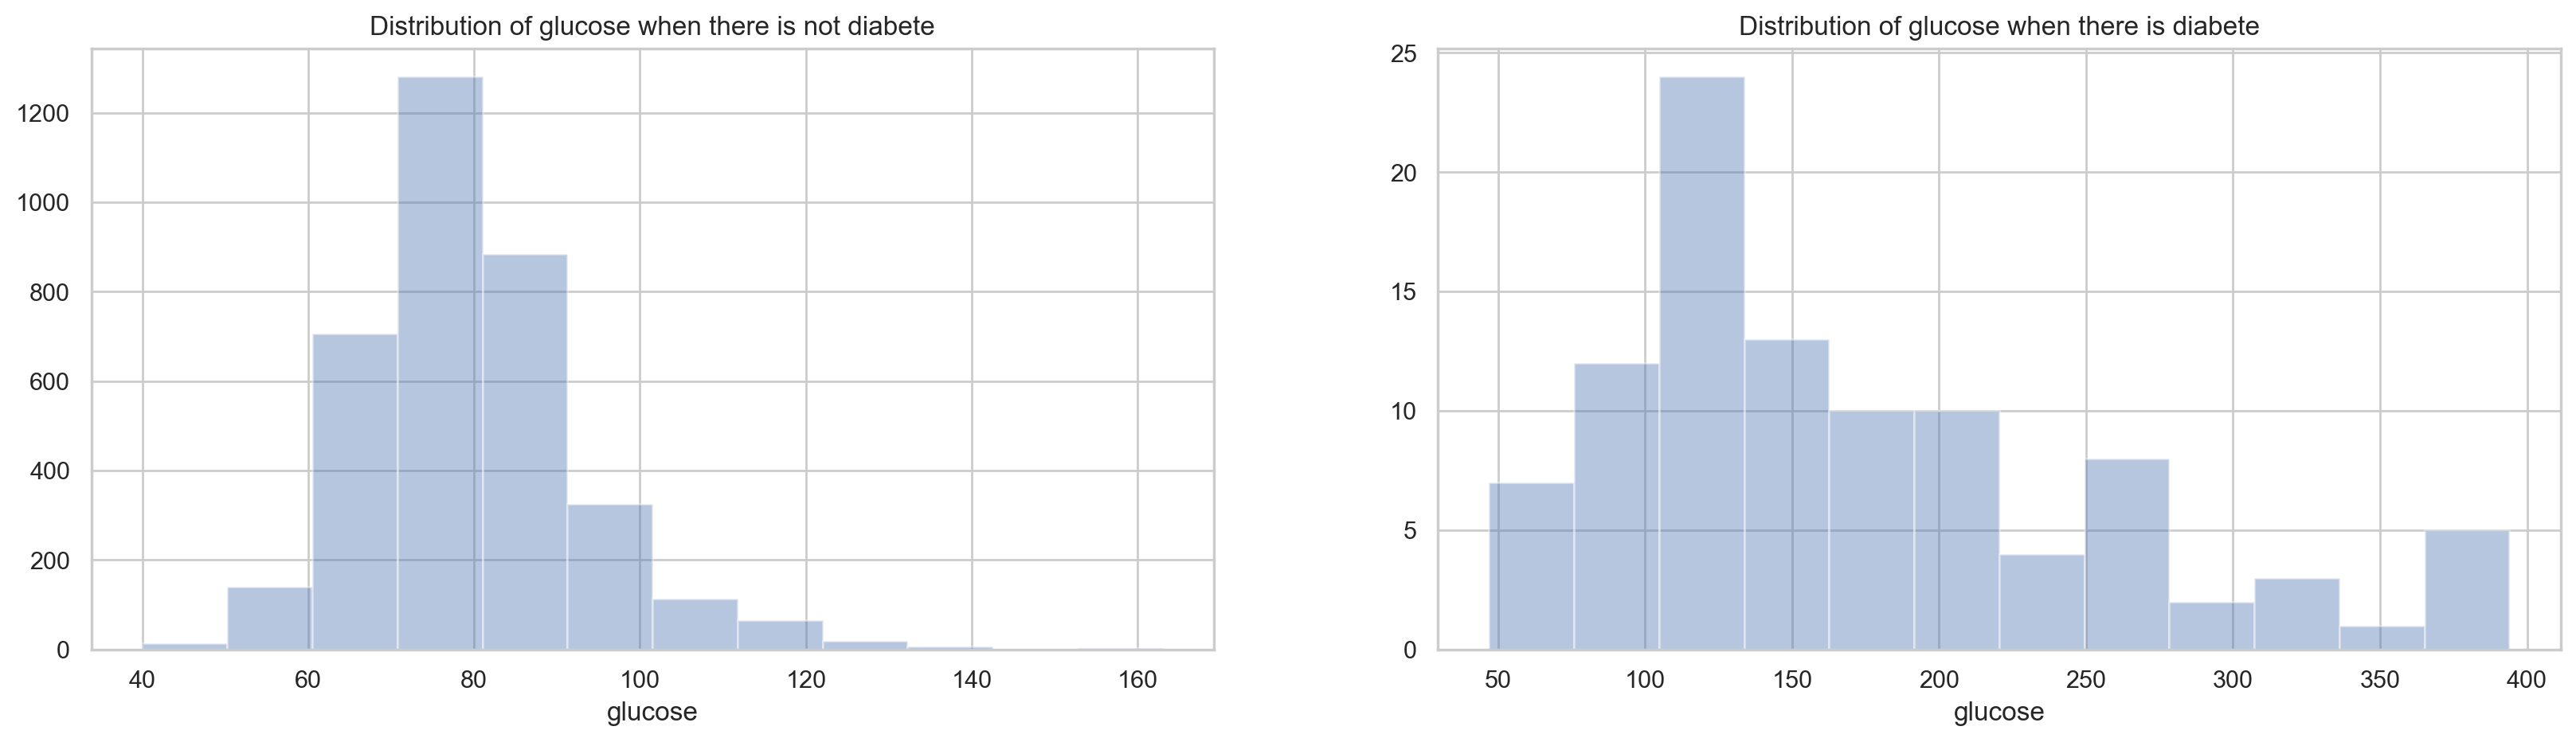

In [357]:
#### Lets plot distributions of glucose when diabetes = 1 and 0 

dataframeWithDiabetesEqualsZero = df[df['diabetes']==0].dropna()
dataframeWithDiabetesEqualsOne = df[df['diabetes']==1].dropna()

plt.figure(figsize=(20,5),dpi=200)
plt.subplot(1,2,1)
plt.title('Distribution of glucose when there is not diabete')
sns.distplot(dataframeWithDiabetesEqualsZero['glucose'], kde=False, bins=12)
plt.subplot(1,2,2)
plt.title('Distribution of glucose when there is diabete')
sns.distplot(dataframeWithDiabetesEqualsOne['glucose'], kde=False, bins=12)

#### So, it is apparent that those who have diabetes have higher probability to have gher glucose levels

#### Thus, it is quite reasonable to impute glucose with mean who does not have diabetes

#### Those who have diabetes should be imputed with mean of those who have diabetes

In [358]:
print('Glucose level mean who does not have diabetes = ', round(dataframeWithDiabetesEqualsZero['glucose'].mean()))
print('Glucose level median who has diabetes = ', round(dataframeWithDiabetesEqualsOne['glucose'].median()))

Glucose level mean who does not have diabetes =  79
Glucose level median who has diabetes =  145


In [359]:
#### Lets create two dataframes with glucose not null and null
#### Remember, df1 was a dataframe with glucose null (so we already did it)
#### At the end we will concatenate them
dfWhereGlucoseNotNull = df[df['glucose'].isnull() == False]

In [360]:
#### Divide dataframes with diabetes =1  and diabetes =0 (where glucose is Null)
#### Then impute corresponding values
dfWhereDiabetIsOne = df1[df1['diabetes']==1]
dfWhereDiabetIsOne['glucose'].fillna(round(dataframeWithDiabetesEqualsOne['glucose'].median()), inplace=True)

dfWhereDiabetIsZero = df1[df1['diabetes']==0]
dfWhereDiabetIsZero['glucose'].fillna(round(dataframeWithDiabetesEqualsZero['glucose'].mean()), inplace=True)

In [361]:
dataframes = [dfWhereGlucoseNotNull, dfWhereDiabetIsOne, dfWhereDiabetIsZero]
df = pd.concat(dataframes)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


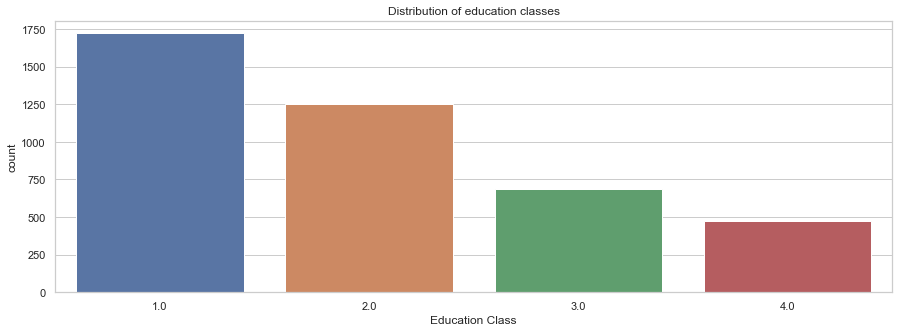

In [362]:
plt.figure(figsize=(15,5))
sns.countplot(x='education',data=df)
plt.title('Distribution of education classes')
plt.xlabel('Education Class')
plt.show()

In [363]:
#### Here we can see value counts of the education columns

df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [364]:
#### As you can see from the series that the majority of people has first-class education. 
#### For this reason, we will fill NaN-Values of Education column with mode of the column.

df['education'].fillna(df2['education'].mode()[0], inplace=True)

In [365]:
### Also here we need to same thing to BPmeds column

df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [366]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace = True)

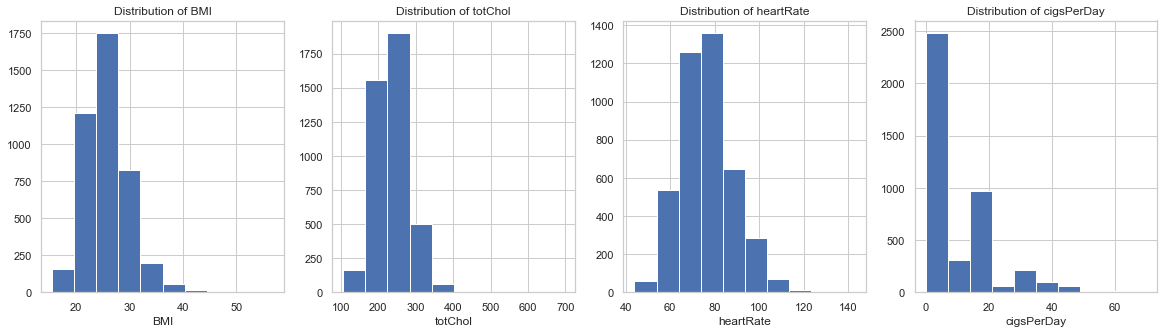

In [367]:
plt.figure(figsize=(20,5))

dtPlotColumns = ['BMI', 'totChol', 'heartRate', 'cigsPerDay']

for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.title('Distribution of ' + dtPlotColumns[i])
    plt.xlabel(dtPlotColumns[i])
    plt.hist(df[dtPlotColumns[i]])

plt.show()

#### As you can see from these tables the distribution of these columns are normally distributed.

In [368]:
#### For this reason, we can replace NaN values with their mean.

for i in range(0,4):
    df[dtPlotColumns[i]].fillna(df[dtPlotColumns[i]].mean(), inplace = True)

### Building Logistic Regression

In [369]:
#### Importing libraries

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [370]:
#### Seperating dependent and independent value

X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [377]:
# KFold Cross Validation approach

kf = KFold(n_splits=5,shuffle=False)
kf.split(X) 

<generator object _BaseKFold.split at 0x0000027028670548>

In [378]:
#### Training the logistic regression model

# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
model = LogisticRegression()

# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = model.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

y_pred = model.predict(X_test)


In [380]:
#### Accuracy of Model

sumEl = 0 
for element in accuracy_model:
    sumEl = element + sumEl
print(sumEl/5)

84.80419237709118


In [381]:
#### Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[720   0]
 [127   0]]
